<a href="https://colab.research.google.com/github/nakata077/Maximum-Credit-Limit-Prediction/blob/main/Maximum_Credit_Limit_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Import Libraries**

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from scipy.stats import randint
import pandas as pd # data processing, CSV file I/O, data manipulation 
import matplotlib.pyplot as plt # this is used for the plot the graph 
import seaborn as sns # used for plot interactive graph. 
from pandas import set_option
plt.style.use('ggplot') # nice plots

from sklearn.model_selection import train_test_split # to split the data into two parts
from sklearn.linear_model import LogisticRegression # to apply the Logistic regression
from sklearn.feature_selection import RFE
from sklearn.model_selection import KFold # for cross validation
from sklearn.model_selection import GridSearchCV # for tuning parameter
from sklearn.model_selection import RandomizedSearchCV  # Randomized search on hyper parameters.
from sklearn.preprocessing import StandardScaler # for normalization
from sklearn.pipeline import Pipeline 
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier #KNN
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn import metrics # for the check the error and accuracy of the model
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

import os

In [ ]:
data = pd.read_csv("/content/sample_data/UCI_Credit_Card.csv")
data.head(5)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


# **Explanation on Features**

**LIMIT_BAL**: Amount of the given credit (dollar): it includes both the individual consumer credit and his/her family (supplementary) credit. \\
**SEX**: (1 = male; 2 = female). \\
**Education**: (1 = graduate school; 2 = university; 3 = high school; 4 = others). \\
**MARRIAGE**: (1 = married; 2 = single; 3 = others). \\
**Age**: (year old). \\
**PAY_0 - PAY_6**: History of past payment. We tracked the past monthly payment records (from April to September, 2005) \\
**BILL_AMT1 - BILL_AMT6**: Amount of bill statement (from April to September, 2005) \\
**default.payment.next.month**: Default payment (1=yes, 0=no)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11109 entries, 0 to 11108
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          11109 non-null  int64  
 1   LIMIT_BAL                   11109 non-null  float64
 2   SEX                         11109 non-null  int64  
 3   EDUCATION                   11109 non-null  int64  
 4   MARRIAGE                    11109 non-null  int64  
 5   AGE                         11109 non-null  int64  
 6   PAY_0                       11109 non-null  int64  
 7   PAY_2                       11109 non-null  int64  
 8   PAY_3                       11109 non-null  int64  
 9   PAY_4                       11109 non-null  int64  
 10  PAY_5                       11109 non-null  int64  
 11  PAY_6                       11109 non-null  int64  
 12  BILL_AMT1                   11108 non-null  float64
 13  BILL_AMT2                   111

In [ ]:
# description on LIMIT_BAL
data['LIMIT_BAL'].describe()

count      30000.000000
mean      167484.322667
std       129747.661567
min        10000.000000
25%        50000.000000
50%       140000.000000
75%       240000.000000
max      1000000.000000
Name: LIMIT_BAL, dtype: float64

<ipython-input-15-98f0720e719f>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y,kde=False,fit=st.norm)
<ipython-input-15-98f0720e719f>:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y,kde=False,fit=st.lognorm)


<Axes: title={'center': 'log normal'}, xlabel='LIMIT_BAL'>

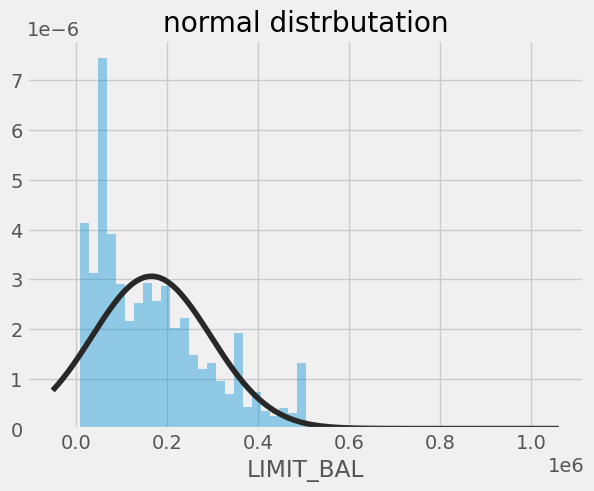

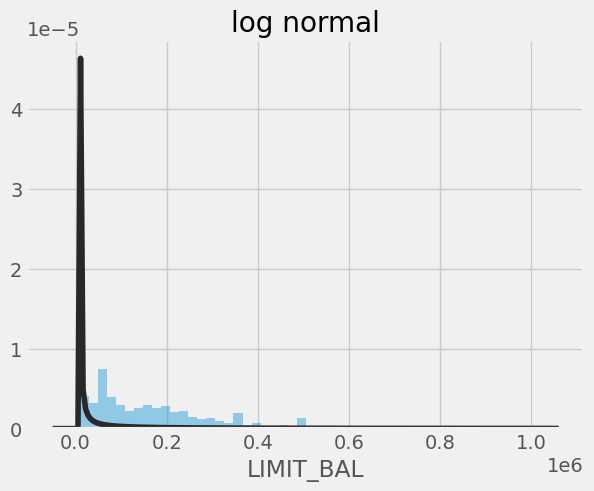

In [ ]:
%matplotlib inline
import scipy.stats as st
y=data['LIMIT_BAL']
plt.style.use('fivethirtyeight')
plt.figure(1);
plt.title('normal distrbutation')
sns.distplot(y,kde=False,fit=st.norm)
plt.figure(2);
plt.title('log normal')
sns.distplot(y,kde=False,fit=st.lognorm)

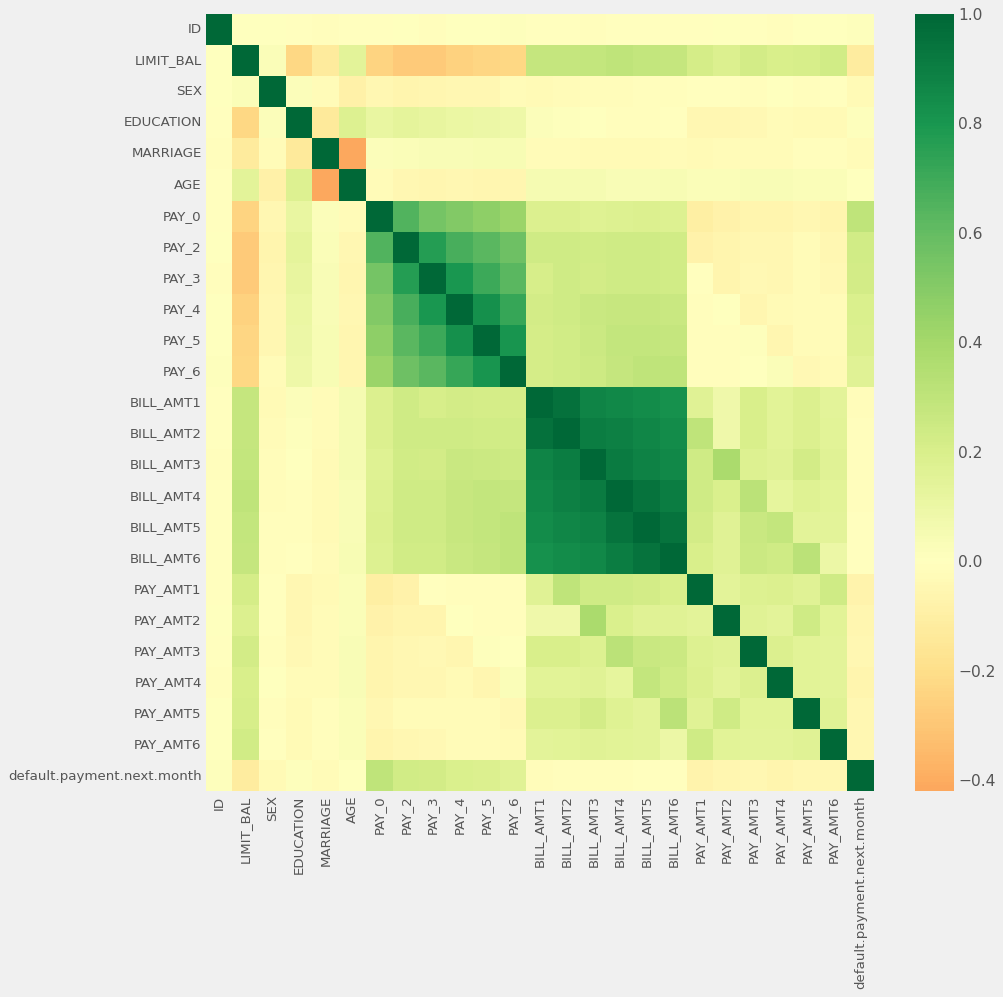

In [ ]:
import seaborn as sns
plt.figure(figsize=(12,12), dpi= 80)
sns.heatmap(data.corr(), cmap='RdYlGn', center=0)

# Decorations
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

# **LIMIT_BALL is highly correlated to AGE and BILL_AMT1 to BILL_AMT6**

In [ ]:
df_corr=data.corr()['LIMIT_BAL'][:-1]
feature_list=df_corr[abs(df_corr)>0.0].sort_values(ascending=False)
feature_list

LIMIT_BAL    1.000000
BILL_AMT4    0.296937
BILL_AMT5    0.286418
BILL_AMT3    0.284201
BILL_AMT1    0.282409
BILL_AMT6    0.279386
BILL_AMT2    0.278438
PAY_AMT6     0.232512
PAY_AMT3     0.226371
PAY_AMT1     0.215795
PAY_AMT5     0.209016
PAY_AMT4     0.205101
PAY_AMT2     0.188607
AGE          0.149867
SEX          0.024198
ID           0.003158
MARRIAGE    -0.121465
PAY_6       -0.228136
EDUCATION   -0.232089
PAY_5       -0.236378
PAY_0       -0.240010
PAY_4       -0.249537
PAY_3       -0.276837
PAY_2       -0.285142
Name: LIMIT_BAL, dtype: float64

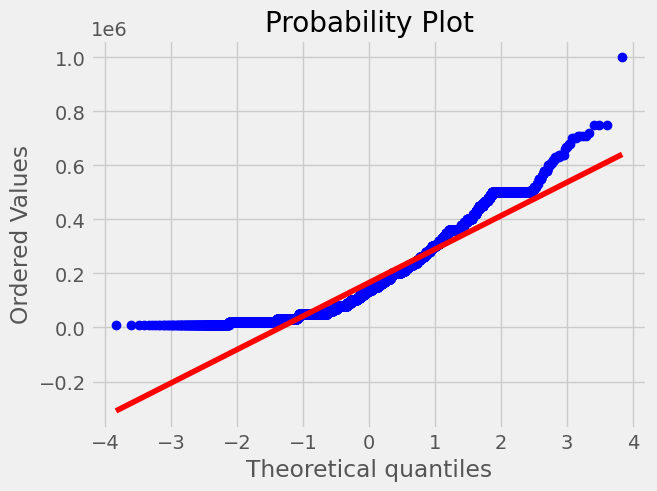

In [ ]:
from scipy import stats
from scipy.stats import norm, skew
fig = plt.figure()
res = stats.probplot(data['LIMIT_BAL'], plot=plt)
plt.show()

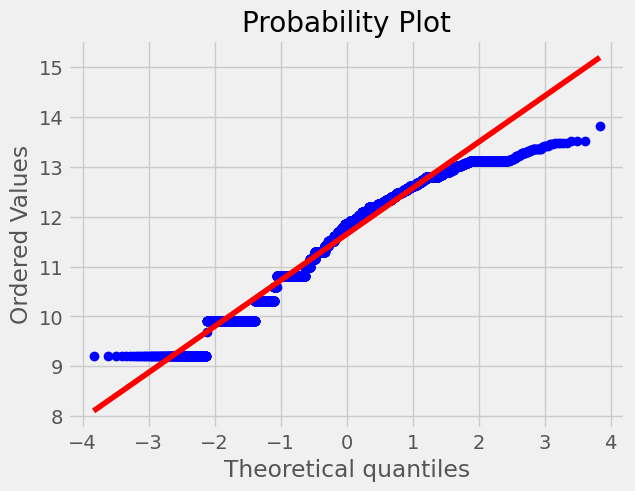

In [ ]:
x=data
x['LIMIT_BAL']=np.log1p(x['LIMIT_BAL'])
fig = plt.figure()
res = stats.probplot(x['LIMIT_BAL'], plot=plt)
plt.show()

# **Finding Missing Values**

<Axes: >

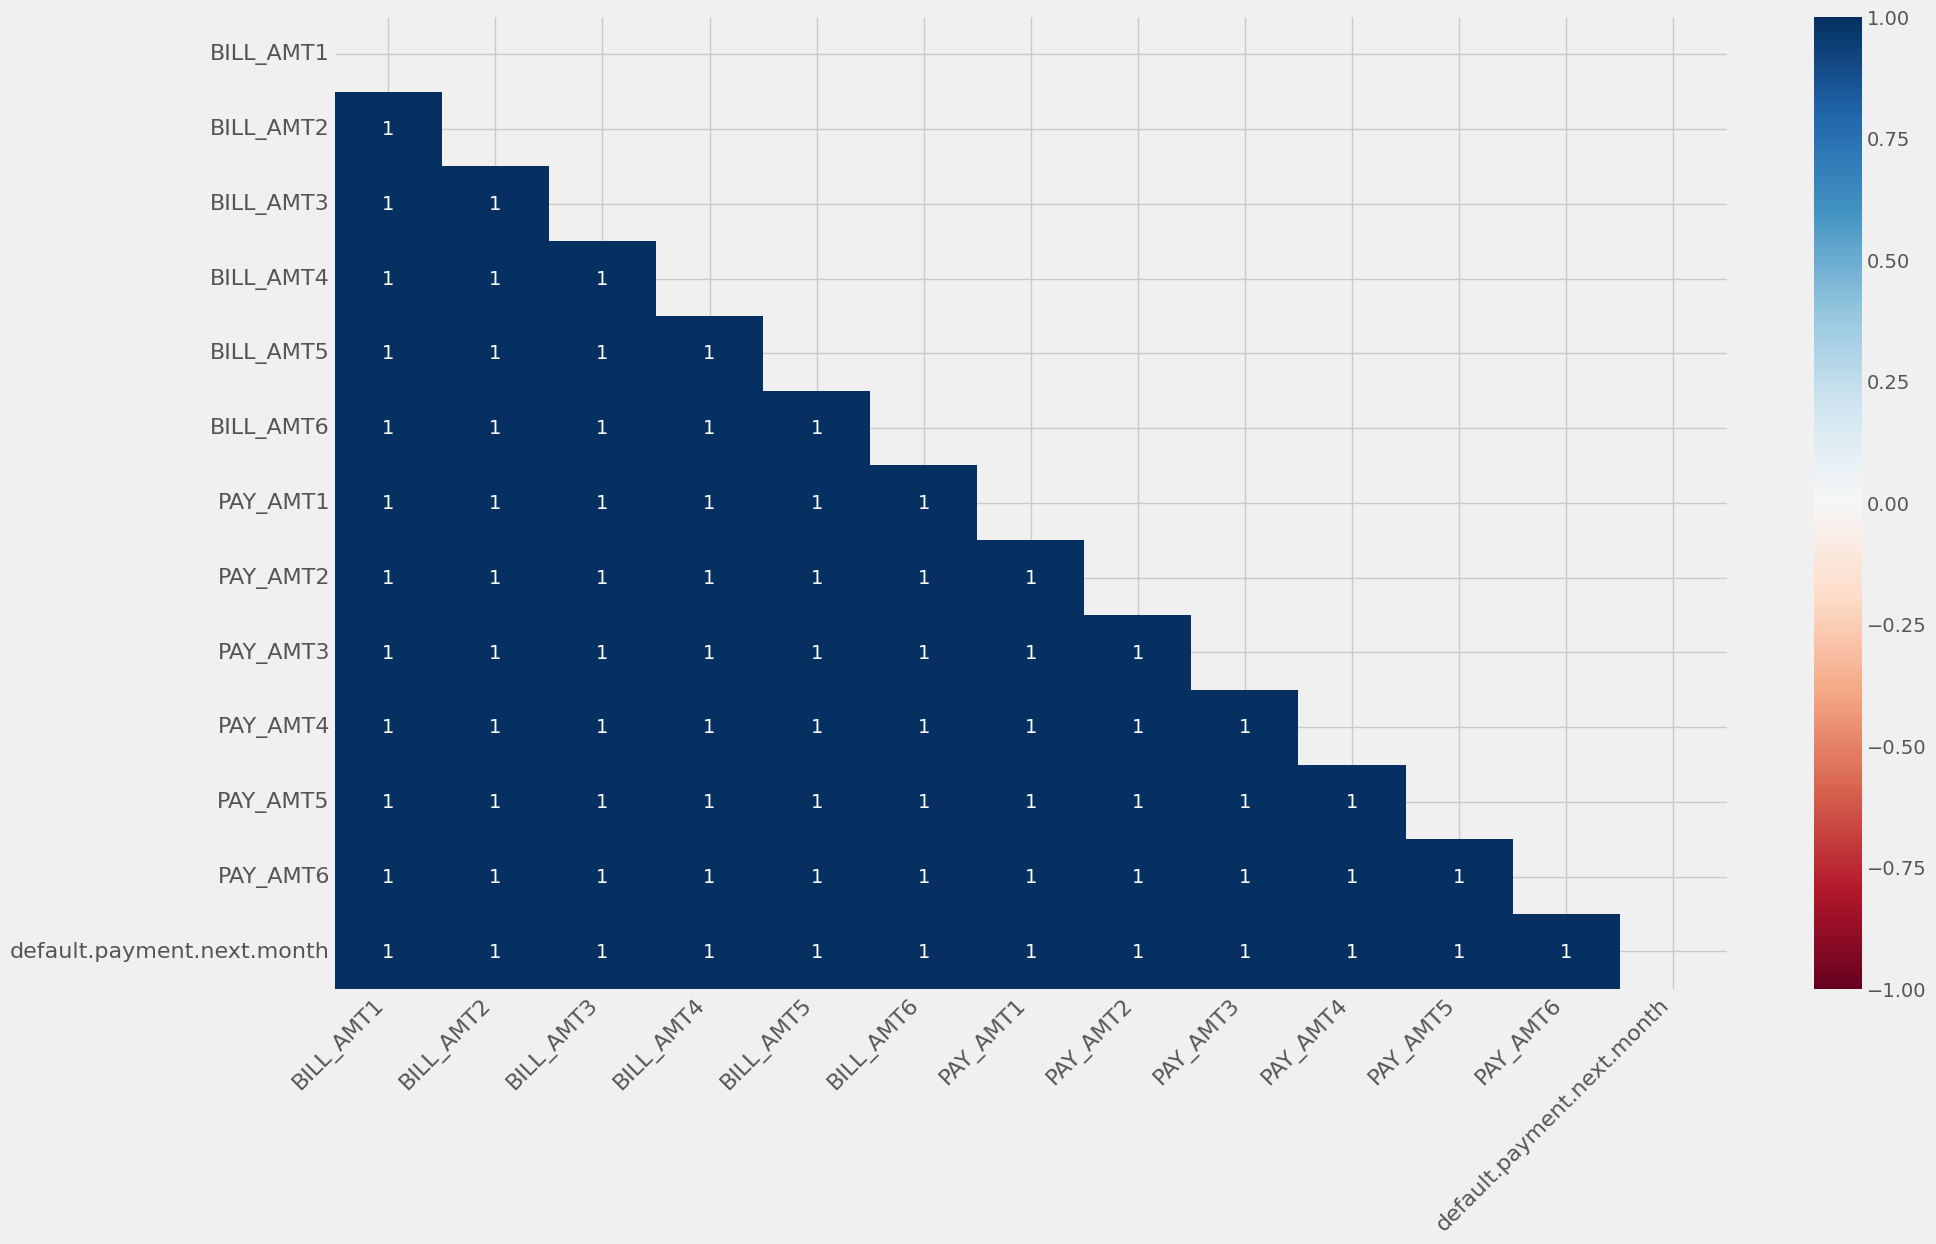

In [ ]:
import missingno as msno
msno.heatmap(data)

In [ ]:
#percent of missing values
df = data
total=df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
BILL_AMT1,1,0.00009
BILL_AMT2,1,0.00009
PAY_AMT6,1,0.00009
PAY_AMT5,1,0.00009
PAY_AMT4,1,0.00009
PAY_AMT3,1,0.00009
PAY_AMT2,1,0.00009
PAY_AMT1,1,0.00009
BILL_AMT6,1,0.00009
BILL_AMT5,1,0.00009


In [ ]:
numerical_features = data.select_dtypes(exclude = ["object"]).columns
numerical_features

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default.payment.next.month'],
      dtype='object')

# **Fill Nan with mean**

In [ ]:
# Fill Nan with mean 

for col in numerical_features:
  data[col] = data[col].fillna(data[col].dropna().mean())

# **Create new feature = average_BILL_AMT**

In [ ]:
# Create new feature = average_BILL_AMT
data['average_BILL_AMT'] = abs(data['BILL_AMT1'] + data['BILL_AMT2'] + data['BILL_AMT3'] + data['BILL_AMT4'] + data['BILL_AMT5'] + data['BILL_AMT6'])/6

data.head(5)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month,average_BILL_AMT
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1,1284.000000
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1,2846.166667
2,3,90000.0,2,2,2,34,0,0,0,0,...,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0,16942.166667
3,4,50000.0,2,2,1,37,0,0,0,0,...,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0,38555.666667
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0,18223.166667


In [ ]:
# description on average_BILL_AMT
data['average_BILL_AMT'].describe()

count     30000.000000
mean      45000.001300
std       63244.322620
min           0.000000
25%        4822.625000
50%       21055.416667
75%       57104.416667
max      877313.833333
Name: average_BILL_AMT, dtype: float64

In [ ]:
#below_5000 = data[data['average_BILL_AMT'] < 1]
#below_5000['LIMIT_BAL'].max()

In [ ]:
#below_60000 = data[(data.average_BILL_AMT > 5000) & (data.average_BILL_AMT < 60000)]
#below_60000['LIMIT_BAL'].max()

In [ ]:
#below_1000000 = data[(data.average_BILL_AMT > 60000) & (data.average_BILL_AMT < 900000)]
#['LIMIT_BAL'].max()

In [ ]:
below_300000= data[data['LIMIT_BAL'] < 100000]
below_300000['average_BILL_AMT'].max()

171404.66666666666

In [ ]:
below_600000 = data[(data['LIMIT_BAL'] > 100000) & (data['LIMIT_BAL']< 200000)]
below_600000['average_BILL_AMT'].max()

280560.3333333333

In [ ]:
below_700000 = data[(data['LIMIT_BAL'] > 200000) & (data['LIMIT_BAL']< 300000)]
below_700000['average_BILL_AMT'].max()

475502.6666666667

In [ ]:
below_800000 = data[(data['LIMIT_BAL'] > 300000) & (data['LIMIT_BAL']<= 1000000)]
below_800000['average_BILL_AMT'].max()

877313.8333333334

In [ ]:
def conditions(data):
    if (data['average_BILL_AMT'] <= 171404.66666666666):
        return 1
    elif (data['average_BILL_AMT'] > 171404.66666666666) & (data['average_BILL_AMT'] <= 280560.3333333333):
        return 2  
    elif (data['average_BILL_AMT'] > 280560.3333333333) & (data['average_BILL_AMT'] <= 475502.6666666667):
        return 3  
    elif (data['average_BILL_AMT'] > 475502.6666666667) & (data['average_BILL_AMT'] <= 900000):
        return 4  
    else:
        return 0

In [ ]:
def conditions(data):
    if (data['LIMIT_BAL'] <= 100000):
        return 1
    elif (data['LIMIT_BAL'] > 100000) & (data['LIMIT_BAL'] <= 200000):
        return 2  
    elif (data['LIMIT_BAL'] > 200000) & (data['LIMIT_BAL'] <= 300000):
        return 3  
    elif (data['LIMIT_BAL'] > 300000):
        return 4  
    else:
        return 0

# **Add Target for Prediction ** \\
MAX_LIMIT_BAL = Maximum Limit Credit \\
1 = Maximum Limit <= 100000 \\
2 = Maximum Limit is between 100000 and 200000 \\
3 = Maximum Limit is between 200000 and 300000 \\
4 = Maximum Limit > 300000 \\

In [ ]:
data['MAX_LIMIT_BAL'] = data.apply(conditions, axis=1)

In [ ]:
data.head(10)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month,MAX_LIMIT_BAL
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1,2
2,3,90000.0,2,2,2,34,0,0,0,0,...,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0,1
3,4,50000.0,2,2,1,37,0,0,0,0,...,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0,1
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0,1
5,6,50000.0,1,1,2,37,0,0,0,0,...,19619.0,20024.0,2500.0,1815.0,657.0,1000.0,1000.0,800.0,0,1
6,7,500000.0,1,1,2,29,0,0,0,0,...,483003.0,473944.0,55000.0,40000.0,38000.0,20239.0,13750.0,13770.0,0,4
7,8,100000.0,2,2,2,23,0,-1,-1,0,...,-159.0,567.0,380.0,601.0,0.0,581.0,1687.0,1542.0,0,1
8,9,140000.0,2,3,1,28,0,0,2,0,...,11793.0,3719.0,3329.0,0.0,432.0,1000.0,1000.0,1000.0,0,2
9,10,20000.0,1,3,2,35,-2,-2,-2,-2,...,13007.0,13912.0,0.0,0.0,0.0,13007.0,1122.0,0.0,0,1


# **Model Training and Testing**

In [ ]:
X = data.drop('ID', axis = 1)

In [ ]:
y = X['MAX_LIMIT_BAL']
X = X.drop(['LIMIT_BAL','MAX_LIMIT_BAL'], axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [ ]:
X_train.head(5)

,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
15925,2,2,2,31,-2,-2,-2,-2,-2,-2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
10062,1,2,1,31,1,2,2,0,0,0,...,28170.0,28763.0,28453.0,3019.0,6.0,991.0,1032.0,1310.0,2000.0,0
19376,2,4,2,38,-2,-2,-2,-2,-2,-2,...,40626.0,9255.0,8659.0,2265.0,24905.0,40827.0,30844.0,8695.0,3532.0,0
6384,2,2,2,22,0,0,0,0,0,0,...,20055.0,19606.0,19925.0,1298.0,1909.0,1666.0,5000.0,703.0,775.0,0
15976,2,2,1,48,1,2,0,0,0,0,...,19378.0,18874.0,19361.0,0.0,2000.0,1500.0,1000.0,2000.0,1000.0,1


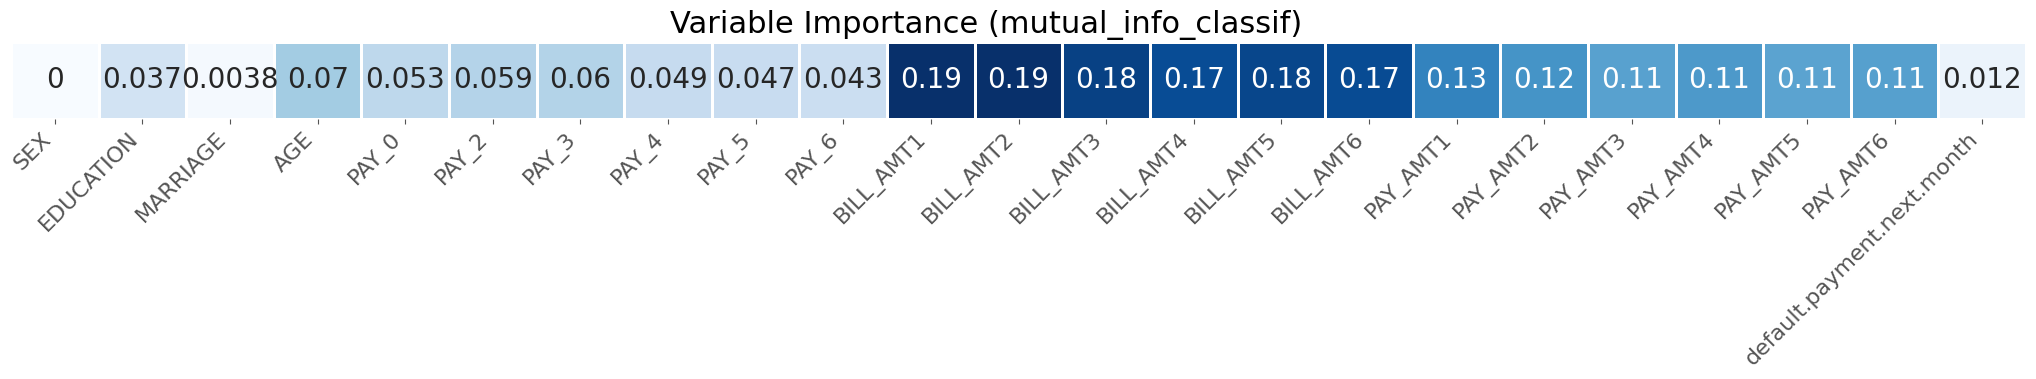

In [ ]:
from sklearn.feature_selection import mutual_info_classif
mutual_information = mutual_info_classif(X_train, y_train, n_neighbors=5, copy = True)

plt.subplots(1, figsize=(26, 1))
sns.heatmap(mutual_information[:, np.newaxis].T, cmap='Blues', cbar=False, linewidths=1, annot=True, annot_kws={"size": 20})
plt.yticks([], [])
plt.gca().set_xticklabels(X_train.columns, rotation=45, ha='right', fontsize=16)
plt.suptitle("Variable Importance (mutual_info_classif)", fontsize=22, y=1.2)
plt.gcf().subplots_adjust(wspace=0.2)


Text(0.5, 0, 'Relative Importance')

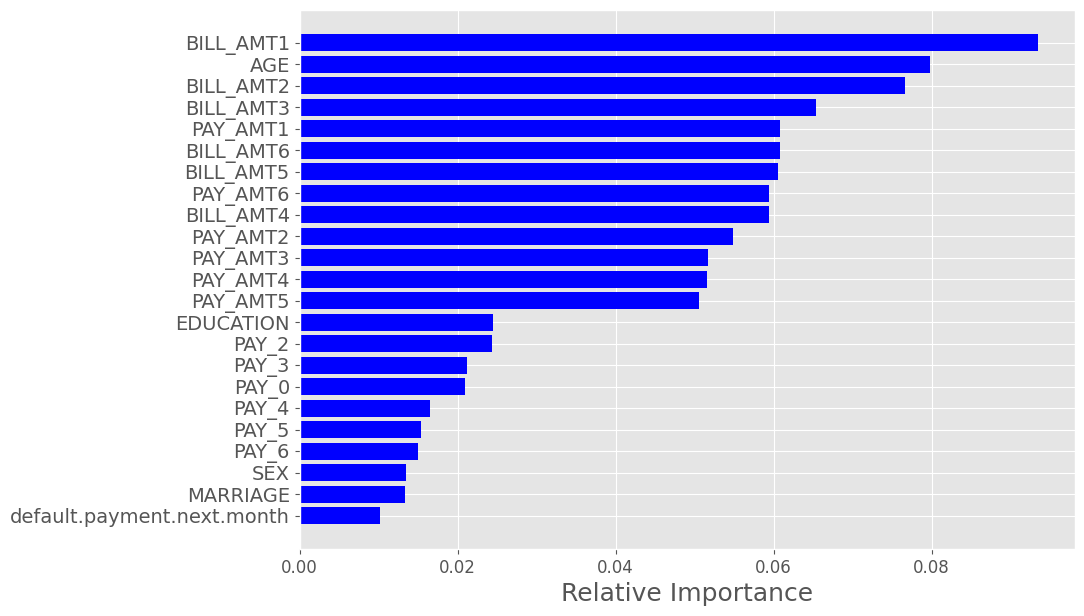

In [ ]:
# plot important feature 
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier(n_estimators=500, n_jobs=-1, random_state=42)
rf_clf.fit(X_train, y_train)

features = list(X_train.columns)
importances = rf_clf.feature_importances_
indices = np.argsort(importances)

fig, ax = plt.subplots(figsize=(10, 7))
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
ax.tick_params(axis="x", labelsize=12)
ax.tick_params(axis="y", labelsize=14)
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance', fontsize = 18)

In [ ]:
#create with selected feature
df_feature_sl = data[['AGE','BILL_AMT1','BILL_AMT2','BILL_AMT3','BILL_AMT4','BILL_AMT5']]

X = data.drop('LIMIT_BAL', axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [ ]:
from tensorflow import keras
from keras.utils import to_categorical

trainY = to_categorical(y_train)
testY = to_categorical(y_test)

# Define the model architecture
model = keras.models.Sequential()
model.add(keras.layers.Dense(64, activation='relu', input_dim=23))
model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dense(5, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, trainY, epochs=20, batch_size=32)
predictions = model.predict(X_test)

class_probabilities = predictions[:, :]

Epoch 1/20
657/657 [==============================] - 2s 2ms/step - loss: 1021.6152 - accuracy: 0.2812
Epoch 2/20
657/657 [==============================] - 3s 4ms/step - loss: 485.9812 - accuracy: 0.2880
Epoch 3/20
657/657 [==============================] - 3s 5ms/step - loss: 331.8546 - accuracy: 0.3101
Epoch 4/20
657/657 [==============================] - 1s 2ms/step - loss: 265.2453 - accuracy: 0.3130
Epoch 5/20
657/657 [==============================] - 1s 2ms/step - loss: 209.2850 - accuracy: 0.3282
Epoch 6/20
657/657 [==============================] - 1s 2ms/step - loss: 168.8890 - accuracy: 0.3323
Epoch 7/20
657/657 [==============================] - 1s 2ms/step - loss: 138.8386 - accuracy: 0.3445
Epoch 8/20
657/657 [==============================] - 1s 2ms/step - loss: 107.4588 - accuracy: 0.3528
Epoch 9/20
657/657 [==============================] - 1s 2ms/step - loss: 99.3299 - accuracy: 0.3550
Epoch 10/20
657/657 [==============================] - 2s 3ms/step - loss: 79.6435

# **The accuracy from deep learning is around 42%**

In [ ]:
num_classes = 4
for i in range(num_classes):
    X_test[f'class_prob_{i+1}'] = [class_prob[i] for class_prob in class_probabilities]

In [ ]:
X_test

,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,...,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month,class_prob_1,class_prob_2,class_prob_3,class_prob_4
11599,1,2,1,57,0,0,-1,0,0,0,...,50499.0,1000.0,1500.0,1500.0,1000.0,0,0.000000e+00,0.000002,0.149638,0.000480
13820,1,3,2,52,0,0,0,0,0,0,...,1500.0,2000.0,1500.0,2000.0,2000.0,0,9.241848e-04,0.524649,0.315303,0.148209
18664,2,2,2,28,0,0,0,0,0,0,...,2398.0,2000.0,2000.0,1700.0,2005.0,0,9.241848e-04,0.524649,0.315303,0.148209
2308,1,2,2,25,0,0,0,0,0,0,...,2000.0,1500.0,1500.0,1500.0,2000.0,0,9.241848e-04,0.524649,0.315303,0.148209
21596,2,1,2,25,-1,-1,-1,-2,-1,-1,...,0.0,0.0,7240.0,0.0,0.0,0,2.868362e-35,0.000658,0.023246,0.976081
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20606,1,1,2,30,-2,-2,-2,-2,-2,-2,...,7542.0,1200.0,0.0,0.0,689.0,0,1.145772e-24,0.800776,0.191734,0.001282
28575,2,2,1,30,-1,-1,-1,-1,-1,-1,...,1650.0,1650.0,1650.0,1650.0,1650.0,1,1.581633e-07,0.662374,0.262447,0.071832
3478,2,1,2,36,-1,-1,-1,-1,-1,-1,...,4283.0,3338.0,1224.0,31022.0,1088.0,0,0.000000e+00,0.730255,0.240673,0.011485
16574,1,2,2,24,2,-1,-1,-2,-2,-2,...,0.0,0.0,0.0,0.0,0.0,0,5.694420e-05,0.625204,0.305023,0.064893


# **I incorporated the probabilities of each class provided by deep learning to the dtat set as new features before feeding the data to XGBoost for improved performance.**

In [ ]:
y = y_test
X = X_test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [ ]:
from sklearn.model_selection import StratifiedKFold
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y_train = le.fit_transform(y_train)

parameters = {
        'min_child_weight': [1, 5],
        'gamma': [0.5, 2],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5]
        }

estimator = XGBClassifier(
    objective= 'multi:softmax',
    nthread=4,
    seed=42
)

grid_search = GridSearchCV(
    estimator=estimator,
    param_grid=parameters,
    scoring = 'roc_auc',
    n_jobs = 5,
    cv = 5,
    verbose=True
)

grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 108 candidates, totalling 540 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:952: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan]
  warnings.warn(


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None, nthread=4,
                                     num_parallel_tree=None,
                                     objective='multi:softmax', ...),
             n_jobs=5,
             param_grid={'colsample_bytree': [0.6, 0.8, 1.0], 'gamma': [0.5, 2],
                         'max_depth': [3, 4, 5], 'min_child_weight': [1, 5],
                         'subsample': [0.6, 0.8, 1.0]},
             scoring='roc_auc', verbose=True)

In [ ]:
grid_search.best_params_
xgb = grid_search.best_estimator_

In [ ]:
# prediction

le = LabelEncoder()
y_test = le.fit_transform(y_test)

xgb.fit(X_test, y_test)

y_test_predict = xgb.predict(X_test)
xgb.score(X_test, y_test)

0.8374074074074074

# **The Accuracy is improved from 42% to 83%**

# **I am attempting to utilize a dataset that includes the new features to make predictions using the Random Forest algorithm**

In [ ]:
# do grid_search
from sklearn.model_selection import GridSearchCV

param_grid = [
    {'n_estimators': [3, 15, 15], 'max_features': [2, 4, 6, 8]},
    {'bootstrap': [False], 'n_estimators': [3, 5, 10], 'max_features': [10, 15, 23]},
  ]

forest_reg = RandomForestClassifier(random_state=42)
# train across 5 folds, that's a total of (12+6)*5=90 rounds of training 
grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
                           scoring='f1',
                           return_train_score=True)
grid_search.fit(X_train, y_train)

In [ ]:
grid_search.best_params_
rf_clf = grid_search.best_estimator_

In [ ]:
# prediction
rf_clf.fit(X_test, y_test)

y_test_predict = rf_clf.predict(X_test)
rf_clf.score(X_test, y_test)

0.9148148148148149

# **The accuracy is now 91%**

In [ ]:
d = {'Answer': y_test + 1, 'y_predict': y_test_predict + 1}
rdf_r_decision = pd.DataFrame(data=d)
rdf_r_decision.head(10)

,Answer,y_predict
0,1,1
1,3,3
2,1,1
3,1,4
4,1,1
5,2,2
6,2,2
7,3,3
8,1,1
9,3,2
